In [1]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# 1. Feature Engineering for _Environmental Sensor Telemetry Data_

## Problem 1.1

In [2]:
env_df = pd.read_csv("iot_telemetry_dataset.csv")

### (a)

  This is an unsuipervised meachine learning task as all of the various features are independent of each other. 

### (b)

In [3]:
env_df.shape

(405184, 9)

### (c)



In [5]:
print("Samples of MAC Address 00:0f:00:70:91:0a: ",format(len(env_df.loc[env_df['device'] == '00:0f:00:70:91:0a'])))

Samples of MAC Address 00:0f:00:70:91:0a:  111815


### (d)

In [6]:
print("Samples of MAC Address 1c:bf:ce:15:ec:4d: ",format(len(env_df.loc[env_df['device'] == '1c:bf:ce:15:ec:4d'])))

Samples of MAC Address 1c:bf:ce:15:ec:4d:  105918


### (e)

In [7]:
print("Samples of MAC Address b8:27:eb:bf:9d:51: ",format(len(env_df.loc[env_df['device'] == 'b8:27:eb:bf:9d:51'])))

Samples of MAC Address b8:27:eb:bf:9d:51:  187451


## Problem 1.2

### (a)

In [3]:
## One Hot Encoding Categorical Features ##

# Changing light and motion from categorical bool values to numerical 0 and 1 
# 0 = False, 1 = True
env_df[['light', 'motion']] = env_df[['light', 'motion']].astype(int)

# Changing device using label encoding
label_device = {"device": {'00:0f:00:70:91:0a': 0, '1c:bf:ce:15:ec:4d':1, 'b8:27:eb:bf:9d:51':2}} 
env_df.replace(label_device, inplace= True)
env_df.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,2,0.004956,51.000000,0,0.007651,0,0.020411,22.700000
1,1.594512e+09,0,0.002840,76.000000,0,0.005114,0,0.013275,19.700001
2,1.594512e+09,2,0.004976,50.900000,0,0.007673,0,0.020475,22.600000
3,1.594512e+09,1,0.004403,76.800003,1,0.007023,0,0.018628,27.000000
4,1.594512e+09,2,0.004967,50.900000,0,0.007664,0,0.020448,22.600000


In [5]:
ohe_env = pd.get_dummies(data=env_df, columns = ['device','light','motion'])

# keep the same ordering as original dataset
ohe_env = ohe_env[['ts','device_0','device_1','device_2','co','humidity','light_0','light_1','lpg',
                  'motion_0','motion_1', 'smoke','temp']]
ohe_env.head()

,ts,device_0,device_1,device_2,co,humidity,light_0,light_1,lpg,motion_0,motion_1,smoke,temp
0,1.594512e+09,0,0,1,0.004956,51.000000,1,0,0.007651,1,0,0.020411,22.700000
1,1.594512e+09,1,0,0,0.002840,76.000000,1,0,0.005114,1,0,0.013275,19.700001
2,1.594512e+09,0,0,1,0.004976,50.900000,1,0,0.007673,1,0,0.020475,22.600000
3,1.594512e+09,0,1,0,0.004403,76.800003,0,1,0.007023,1,0,0.018628,27.000000
4,1.594512e+09,0,0,1,0.004967,50.900000,1,0,0.007664,1,0,0.020448,22.600000


### (b)

In [6]:
## Standardize the device values ## 

# device 0
device_zero = ohe_env.loc[ohe_env['device_0'] == 1]
device_zero = device_zero.drop(['ts','device_1','device_2','light_0','light_1','motion_0','motion_1'], axis=1)
device_zero_mean = device_zero.loc[:,'co':'temp'] - device_zero.loc[:,'co':'temp'].mean()
device_zero_var = device_zero_mean / (device_zero_mean.std())

# device 1
device_one = ohe_env.loc[ohe_env['device_1'] == 1]
device_one = device_one.drop(['ts','device_0','device_2','light_0','light_1','motion_0','motion_1'], axis=1)
device_one_mean = device_one.loc[:,'co':'temp'] - device_one.loc[:,'co':'temp'].mean()
device_one_var = device_one_mean / (device_one_mean.std())

# device 2
device_two = ohe_env.loc[ohe_env['device_2'] == 1]
device_two = device_two.drop(['ts','device_0','device_1','light_0','light_1','motion_0','motion_1'], axis=1)
device_two_mean = device_two.loc[:,'co':'temp'] - device_two.loc[:,'co':'temp'].mean()
device_two_var = device_two_mean / (device_two_mean.std())



# -- Non standardized for 1.2e -- ##
zero_mean_e = device_zero.loc[:,'co':'temp'].mean()
zero_var_e =  device_zero.loc[:,'co':'temp'].var()

one_mean_e = device_one.loc[:,'co':'temp'].mean()
one_var_e = device_one.loc[:,'co':'temp'].var()

two_mean_e = device_two.loc[:,'co':'temp'].mean()
two_var_e = device_two.loc[:,'co':'temp'].var()

In [7]:
# combining the three separate sub-datasets 
env_comb = [device_zero_var, device_one_var, device_two_var]
stand_env = pd.concat(env_comb)
standard_env = stand_env.sort_index(axis = 0)

# Values back in the One Hot Encoded dataset
ohe_env['co'] = standard_env['co']
ohe_env['humidity'] = standard_env['humidity']
ohe_env['lpg'] = standard_env['lpg']
ohe_env['smoke'] = standard_env['smoke']
ohe_env['temp'] = standard_env['temp']

ohe_env

,ts,device_0,device_1,device_2,co,humidity,light_0,light_1,lpg,motion_0,motion_1,smoke,temp
0,1.594512e+09,0,0,1,-1.080793,0.098428,1,0,-1.093491,1,0,-1.091260,0.871610
1,1.594512e+09,1,0,0,-0.464451,0.281222,1,0,-0.458333,1,0,-0.460392,0.524162
2,1.594512e+09,0,0,1,-1.044864,0.045488,1,0,-1.056107,1,0,-1.054137,0.664099
3,1.594512e+09,0,1,0,0.687051,1.664629,0,1,0.696248,1,0,0.694633,0.480890
4,1.594512e+09,0,0,1,-1.060344,0.045488,1,0,-1.072209,1,0,-1.070127,0.664099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,1,0,0,0.147282,-0.073063,1,0,0.207861,1,0,0.197069,-0.252493
405180,1.595203e+09,0,0,1,0.577180,-1.225075,1,0,0.591201,1,0,0.588734,-0.165945
405181,1.595203e+09,0,1,0,1.115988,1.541651,0,1,1.119565,1,0,1.118965,0.283499
405182,1.595203e+09,1,0,0,0.147282,-0.073063,1,0,0.207861,1,0,0.197069,-0.252493


### (c)

In [63]:
ohe_env.head(20)

,ts,device_0,device_1,device_2,co,humidity,light_0,light_1,lpg,motion_0,motion_1,smoke,temp
0,1.594512e+09,0,0,1,-1.080793,0.098428,1,0,-1.093491,1,0,-1.091260,0.871610
1,1.594512e+09,1,0,0,-0.464451,0.281222,1,0,-0.458333,1,0,-0.460392,0.524162
2,1.594512e+09,0,0,1,-1.044864,0.045488,1,0,-1.056107,1,0,-1.054137,0.664099
3,1.594512e+09,0,1,0,0.687051,1.664629,0,1,0.696248,1,0,0.694633,0.480890
4,1.594512e+09,0,0,1,-1.060344,0.045488,1,0,-1.072209,1,0,-1.070127,0.664099
5,1.594512e+09,0,1,0,0.649527,1.787605,0,1,0.659043,1,0,0.657370,0.480890
6,1.594512e+09,0,0,1,-1.044841,0.045488,1,0,-1.056083,1,0,-1.054113,0.664099
7,1.594512e+09,1,0,0,-0.398156,0.281222,1,0,-0.383561,1,0,-0.387058,0.524162
8,1.594512e+09,0,1,0,0.507419,1.787605,0,1,0.517887,1,0,0.516039,0.480890
9,1.594512e+09,0,0,1,-1.055167,0.045488,1,0,-1.066824,1,0,-1.064779,0.664099


### (d)

ts is a feature that is about the timestamp of when the data was collected. It does not need any preprocessing as we just need the time that each device took its measurement. Time does not need to have zero mean or standardization. 

### (e)

In [53]:
group_labels = ['co','humidity','lpg','smoke','temp']
x = np.arange(len(group_labels))
width = 0.2

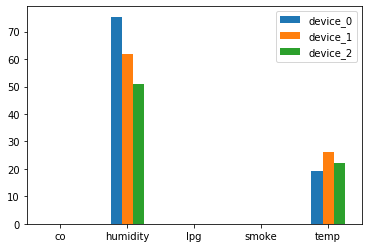

In [64]:
## Mean Grouped Bar Chart ##

zero_device_means = [zero_mean_e[0], zero_mean_e[1], zero_mean_e[2], zero_mean_e[3], zero_mean_e[4]]
one_device_means = [one_mean_e[0], one_mean_e[1], one_mean_e[2], one_mean_e[3], one_mean_e[4]]
two_device_means = [two_mean_e[0], two_mean_e[1], two_mean_e[2], two_mean_e[3], two_mean_e[4]]

mean_df = pd.DataFrame({'device_0': zero_device_means,
                        'device_1': one_device_means,
                        'device_2': two_device_means}, index=group_labels)
ax = mean_df.plot.bar(rot=0)

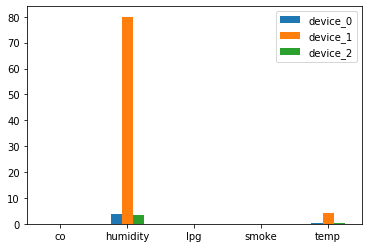

In [57]:
## Variance Grouped Bar Chart ##

zero_device_var = [zero_var_e[0], zero_var_e[1], zero_var_e[2], zero_var_e[3], zero_var_e[4]]
one_device_var = [one_var_e[0], one_var_e[1], one_var_e[2], one_var_e[3], one_var_e[4]]
two_device_var = [two_var_e[0], two_var_e[1], two_var_e[2], two_var_e[3], two_var_e[4]]

mean_df = pd.DataFrame({'device_0': zero_device_var,
                        'device_1': one_device_var,
                        'device_2': two_device_var}, index=group_labels)

ax = mean_df.plot.bar(rot=0)

From these bar graphs, we can see why it is important it standardize the data. Some of the values, most noteably humidity and temperature, have values much higher than the other three features. It would skew the data in their direction. 

## Problem 1.3

In [8]:
# moving the columns around to make pandas indexing less computational 

weather_report = ohe_env[['ts','co','humidity','lpg','smoke','temp',
                    'device_0','device_1','device_2','light_0','light_1','motion_0','motion_1']]

weather_report  # variabled named after American jazz fusion band from the 1970s

,ts,co,humidity,lpg,smoke,temp,device_0,device_1,device_2,light_0,light_1,motion_0,motion_1
0,1.594512e+09,-1.080793,0.098428,-1.093491,-1.091260,0.871610,0,0,1,1,0,1,0
1,1.594512e+09,-0.464451,0.281222,-0.458333,-0.460392,0.524162,1,0,0,1,0,1,0
2,1.594512e+09,-1.044864,0.045488,-1.056107,-1.054137,0.664099,0,0,1,1,0,1,0
3,1.594512e+09,0.687051,1.664629,0.696248,0.694633,0.480890,0,1,0,0,1,1,0
4,1.594512e+09,-1.060344,0.045488,-1.072209,-1.070127,0.664099,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405179,1.595203e+09,0.147282,-0.073063,0.207861,0.197069,-0.252493,1,0,0,1,0,1,0
405180,1.595203e+09,0.577180,-1.225075,0.591201,0.588734,-0.165945,0,0,1,1,0,1,0
405181,1.595203e+09,1.115988,1.541651,1.119565,1.118965,0.283499,0,1,0,0,1,1,0
405182,1.595203e+09,0.147282,-0.073063,0.207861,0.197069,-0.252493,1,0,0,1,0,1,0


In [9]:
## Mean ##
weather_mean = weather_report.loc[:,'co':'temp'].mean(axis=1)
#print(weather_mean)

## Variance ##
weather_var = weather_report.loc[:,'co':'temp'].var(axis=1)
#print(weather_var)

## Kurtosis ## 
weather_kur = sps.kurtosis(weather_report.loc[:,'co':'temp'],axis=1) # utilizing scipy.stats.kurtosis

## Skew ##
weather_skew = sps.skew(weather_report.loc[:,'co':'temp'],axis = 1)

weather_report = pd.DataFrame({'mean': weather_mean,
                               'variance': weather_var,
                               'kurtosis': weather_kur,
                               'skew': weather_skew})
weather_report.head(40)

,mean,variance,kurtosis,skew
0,-0.459101,0.817552,-1.268521,0.673607
1,-0.115558,0.231202,-1.626008,0.504156
2,-0.489104,0.641322,-1.365727,0.626984
3,0.844690,0.218513,0.083334,1.347752
4,-0.498619,0.654782,-1.374738,0.622674
5,0.846887,0.282264,0.157954,1.420887
6,-0.489090,0.641303,-1.365713,0.626990
7,-0.072678,0.195721,-1.589427,0.520788
8,0.761968,0.328947,0.246717,1.497492
9,-0.495437,0.650264,-1.371752,0.624102


# 2. Feature Learning for _Synthetically Generated Data_

## Problem 2.1

### (a)

In [74]:
A = np.random.randn(3,2)
print(A)

[[-0.54048573  0.99361219]
 [ 0.92602679 -0.96535834]
 [-0.42224158 -0.41559427]]


### (b)

In [75]:
A_rank = np.linalg.matrix_rank(A)
print("Rank of A:",A_rank)

Rank of A: 2


### (c)

In [76]:
A_norm = np.linalg.norm(A, axis = 0)
print(A_norm)

inner_product = np.inner(A[:,0],A[:,1])
print("Inner product: ",inner_product)

[1.15236209 1.44634038]
Inner product:  -1.255499705551677


The norm for both vectors are not one. Therefore, they are not unit-norm. </br>

For these two vectors to be orthogonal, the inner product would have to be 0.


### (d)

In [154]:
## Subspace 1 ##
scalar = 2
scalar_mult = np.dot(scalar, A[:,0])
print(scalar_mult)

## Subspace 2 ##
zero_vect = np.dot(0, A[:,0])
print(zero_vect)

## Subspace 3 ##
negative_sub = np.dot(-1, A[:,0])
print(negative_sub)

[-1.08097145  1.85205358 -0.84448315]
[0. 0. 0.]
[ 0.54048573 -0.92602679  0.42224158]


## Problem 2.2

### (a)

In [78]:
n = 250 # number of data samples

b = np.random.randn(2, n) # 2x250 

X = np.dot(A,b)

### (b)

Since each sample **x**<sub>i</sub> is a linear combination of **A**, that means that they lie in the subspace S. 

### (c)

In [79]:
X = X.T # tranpose the matrix -> every data sample is a row in the matrix
print(X)

[[-3.80499575e-01  3.32989245e-01  2.18482201e-01]
 [ 3.58840111e-01 -7.38328125e-01  4.80076865e-01]
 [-9.95361871e-01  6.23563925e-01  9.71788061e-01]
 [-4.02739717e-01  2.34556915e-01  4.21900325e-01]
 [-1.50861104e+00  9.93376701e-01  1.39481198e+00]
 [-1.17414321e+00  1.10098033e+00  5.55424976e-01]
 [ 8.52044779e-01 -1.18827018e+00  2.26505389e-01]
 [ 9.77342381e-01 -7.47097364e-01 -7.36175595e-01]
 [-3.77695272e-01  5.41721774e-01 -1.24636316e-01]
 [ 2.52721777e-01 -1.43677244e-01 -2.70419133e-01]
 [ 2.19594328e-01 -5.48370115e-01  4.49909402e-01]
 [ 1.51899871e+00 -1.39196646e+00 -7.70920645e-01]
 [ 1.14769208e+00 -1.39495701e+00 -2.74164230e-02]
 [ 3.56006587e-01  1.60473374e-01 -9.67730916e-01]
 [-3.42964503e-01  5.88959083e-01 -2.70115924e-01]
 [ 3.18134282e-01  5.77212541e-02 -7.26229055e-01]
 [ 2.66467032e+00 -3.08659133e+00 -3.09727084e-01]
 [-9.35722062e-01  7.85133151e-01  5.91869795e-01]
 [ 1.06662698e+00 -1.39029531e+00  1.26314078e-01]
 [ 1.75113374e+00 -1.96324095e+

In [80]:
print(X.shape)

(250, 3)


For this matrix, n = 250, p = 3

### (d)

In [81]:
X_rank = np.linalg.matrix_rank(X)
print("Rank of X:",X_rank)

Rank of X: 2


## Problem 2.3

### (a)

#### (i)

In [82]:
## Singular Value Decomposition ##
u, s, vt = np.linalg.svd(X)
print(vt.T) # right singular vectors, transposed

[[ 0.65172586 -0.22941352 -0.72292658]
 [-0.75461202 -0.29195645 -0.58764116]
 [-0.07625025  0.92851003 -0.36339377]]


In [83]:
## Eigenvalue Decomposition ##
eigen = np.dot(X.T, X) 
w, v = np.linalg.eigh(eigen) # np.linalg.eigh for symmetric matrices
print(v)

[[ 0.72292658 -0.22941352 -0.65172586]
 [ 0.58764116 -0.29195645  0.75461202]
 [ 0.36339377  0.92851003  0.07625025]]


From this, we can see that the right singular vectors, when transposed, of **X** correspond to the eigenvectors of **X**<sup>T</sup>**X**. **v**<sup>T</sup> needed to be transposed so that it could be in it's non-transposed form. </br>

Aside from some of the signs being flipped, and the order being different, it does not change the fact they are equivalent. 

#### (ii)

In [84]:
## SVD ##
print(s**2)

[8.64080816e+02 9.86118763e+01 9.84250853e-29]


In [85]:
## EVD ##
print(w)

[2.08955683e-13 9.86118763e+01 8.64080816e+02]


#### (iii)

In [86]:
frob_energy = np.linalg.norm(X)**2
print("Frobenious norm squared: ", round(frob_energy, 4))

sin_val = (s[0]**2) + (s[1]**2)
print("Sum of Squares of Singular Values:", round(sin_val, 4))

Frobenious norm squared:  962.6927
Sum of Squares of Singular Values: 962.6927


### (b)

#### (i)

Even though the last singular value has a number, and while not exactly 0 it can be treated as such. This has to do with the finite preicision computers can have, and as such it will not give 0, and thus are just an approximation of a value. 

#### (ii)

Since each sample **x**<sub>i</sub> is a linear combination of **A** which lie on the entire subspace S, this would mean that the two largest singular values form an orthogonal basis for the column space. 

## Problem 2.4


### (a)

Albeit each data sample living in a three dimensional space, one of the Singular Values of this generated dataset is approximately 0. This means that we can find a lower-dimensional subspace that can capture 100% of the information. We can have 2 Principal Components (*k* = 2) so that we can capture all of the energy in the dataset.

### (b)

#### (i)

<center> 
$\begin{bmatrix}x1\\x2\\x3\end{bmatrix}$ = $\begin{bmatrix}a11 & a12\\a21 & a22\\a31 & a32\end{bmatrix}$ 
    $\begin{bmatrix}b1 \\ b2\end{bmatrix}$ <br> <br>
x<sub>k</sub> = a<sub>k1</sub>b<sub>1</sub> + a<sub>k2</sub>b<sub>2</sub> <br>
E[x<sub>k</sub>] = E[a<sub>k1</sub>b<sub>1</sub> + a<sub>k2</sub>b<sub>2</sub>] <br>
E[x<sub>k</sub>] = E[a<sub>k1</sub>b<sub>1</sub>] + E[a<sub>k2</sub>b<sub>2</sub>] <br>
E[x<sub>k</sub>] = E[a<sub>k1</sub>]E[b<sub>1</sub>] + E[a<sub>k2</sub>]E[b<sub>2</sub>] <br>
<br>
E[a<sub>k1</sub>] = E[b<sub>1</sub>] = E[a<sub>k2</sub>] = E[b<sub>2</sub>] = 0 <br>
∴ E[x<sub>k</sub>] = 0 </center

#### (ii)

In [87]:
## Empirical Mean ##
mu = (1/n)*(X.sum(axis=0))
print(mu)

[ 0.08491016 -0.12479679  0.03288973]


### (c)

In [105]:
U = vt[0:2].T
print("Top two principal components: \n\n",U)

Top two principal components: 

 [[ 0.65172586 -0.22941352]
 [-0.75461202 -0.29195645]
 [-0.07625025  0.92851003]]


### (d)

In [106]:
x_squig = np.dot(X, U)
print(x_squig)

[[-5.15918422e-01  1.92936305e-01]
 [ 7.54410679e-01  5.78993065e-01]
 [-1.19335099e+00  9.48610922e-01]
 [-4.71645361e-01  4.15652216e-01]
 [-1.83916959e+00  1.35116995e+00]
 [-1.63838377e+00  4.63643682e-01]
 [ 1.43471149e+00  3.61765069e-01]
 [ 1.25686153e+00 -6.89642087e-01]
 [-6.45439989e-01 -1.87236831e-01]
 [ 2.93745419e-01 -2.67117171e-01]
 [ 5.22616280e-01  5.27467673e-01]
 [ 2.09914826e+00 -6.57892810e-01]
 [ 1.80272245e+00  1.18514186e-01]
 [ 1.84713284e-01 -1.02707182e+00]
 [-6.47358034e-01 -3.44075050e-01]
 [ 2.19154332e-01 -7.64147358e-01]
 [ 4.08943025e+00  2.25413257e-03]
 [-1.24743540e+00  5.34999648e-01]
 [ 1.73465046e+00  2.78490912e-01]
 [ 2.64629966e+00 -1.15389084e-01]
 [-1.10633594e+00 -7.48702412e-01]
 [ 2.56969534e+00 -9.15066485e-03]
 [-4.56282373e-01 -1.29578679e-01]
 [-1.02253713e+00  6.71950450e-01]
 [-1.60063486e+00  9.34566622e-01]
 [-3.20800281e+00  8.18192753e-01]
 [ 1.75522587e+00  7.65267007e-01]
 [-2.49343233e+00 -1.34230903e+00]
 [-2.98772620e+00 -5

### (e)

In [108]:
x_hat = np.dot(x_squig, U.T)
print(x_hat)

[[-3.80499575e-01  3.32989245e-01  2.18482201e-01]
 [ 3.58840111e-01 -7.38328125e-01  4.80076865e-01]
 [-9.95361871e-01  6.23563925e-01  9.71788061e-01]
 [-4.02739717e-01  2.34556915e-01  4.21900325e-01]
 [-1.50861104e+00  9.93376701e-01  1.39481198e+00]
 [-1.17414321e+00  1.10098033e+00  5.55424976e-01]
 [ 8.52044779e-01 -1.18827018e+00  2.26505389e-01]
 [ 9.77342381e-01 -7.47097364e-01 -7.36175595e-01]
 [-3.77695272e-01  5.41721774e-01 -1.24636316e-01]
 [ 2.52721777e-01 -1.43677244e-01 -2.70419133e-01]
 [ 2.19594328e-01 -5.48370115e-01  4.49909402e-01]
 [ 1.51899871e+00 -1.39196646e+00 -7.70920645e-01]
 [ 1.14769208e+00 -1.39495701e+00 -2.74164230e-02]
 [ 3.56006587e-01  1.60473374e-01 -9.67730916e-01]
 [-3.42964503e-01  5.88959083e-01 -2.70115924e-01]
 [ 3.18134282e-01  5.77212541e-02 -7.26229055e-01]
 [ 2.66467032e+00 -3.08659133e+00 -3.09727084e-01]
 [-9.35722062e-01  7.85133151e-01  5.91869795e-01]
 [ 1.06662698e+00 -1.39029531e+00  1.26314078e-01]
 [ 1.75113374e+00 -1.96324095e+

### (f)

In [122]:
## PCA Error ## 

king_crimson = x_hat - X # inner function of PCA error named after 1968 band King Crimson
rolling_stones = np.linalg.norm(king_crimson) # PCA Error named after the Rolling Stones
print(rolling_stones**2)

1.7467551446123012e-28


Another appx error machine side. Number is very small so it can be treated as 0.

### (g)

In [123]:
U2 = vt[0:1].T
print("Top Principal Component: \n\n", U2)

Top Principal Component: 

 [[ 0.65172586]
 [-0.75461202]
 [-0.07625025]]


In [124]:
x_squig_2 = np.dot(X, U2)
print(x_squig_2)

[[-0.51591842]
 [ 0.75441068]
 [-1.19335099]
 [-0.47164536]
 [-1.83916959]
 [-1.63838377]
 [ 1.43471149]
 [ 1.25686153]
 [-0.64543999]
 [ 0.29374542]
 [ 0.52261628]
 [ 2.09914826]
 [ 1.80272245]
 [ 0.18471328]
 [-0.64735803]
 [ 0.21915433]
 [ 4.08943025]
 [-1.2474354 ]
 [ 1.73465046]
 [ 2.64629966]
 [-1.10633594]
 [ 2.56969534]
 [-0.45628237]
 [-1.02253713]
 [-1.60063486]
 [-3.20800281]
 [ 1.75522587]
 [-2.49343233]
 [-2.9877262 ]
 [ 0.77532091]
 [-1.01446217]
 [ 3.11988389]
 [-0.76889952]
 [ 0.12167346]
 [ 0.50776584]
 [-2.12470586]
 [ 1.43798839]
 [-0.03774174]
 [-0.929375  ]
 [ 0.01203259]
 [-0.23880161]
 [ 2.87768787]
 [-0.69010225]
 [-1.3982627 ]
 [-0.95915241]
 [-0.25235862]
 [ 0.28612622]
 [-1.50985749]
 [-0.10565726]
 [-1.79246074]
 [ 1.08578022]
 [-0.44590596]
 [ 2.80226523]
 [ 1.11064834]
 [-0.79317456]
 [ 1.5122937 ]
 [ 0.05549865]
 [-1.00020189]
 [-0.89360582]
 [-0.0213104 ]
 [ 3.17499056]
 [-0.68281692]
 [ 0.51031687]
 [-0.6520819 ]
 [-1.21766257]
 [ 1.68748034]
 [ 2.82292

### (h)

In [125]:
x_hat_2 = np.dot(x_squig_2, U2.T)
print(x_hat_2)

[[-3.36237377e-01  3.89318243e-01  3.93389073e-02]
 [ 4.91668949e-01 -5.69287367e-01 -5.75240009e-02]
 [-7.77737698e-01  9.00516999e-01  9.09933079e-02]
 [-3.07383479e-01  3.55909259e-01  3.59630755e-02]
 [-1.19863438e+00  1.38785948e+00  1.40237136e-01]
 [-1.06777708e+00  1.23634409e+00  1.24927168e-01]
 [ 9.35038577e-01 -1.08265053e+00 -1.09397106e-01]
 [ 8.19129161e-01 -9.48442817e-01 -9.58360024e-02]
 [-4.20649932e-01  4.87056774e-01  4.92149589e-02]
 [ 1.91441486e-01 -2.21663824e-01 -2.23981609e-02]
 [ 3.40602545e-01 -3.94372527e-01 -3.98496206e-02]
 [ 1.36806921e+00 -1.58404251e+00 -1.60060574e-01]
 [ 1.17488084e+00 -1.36035603e+00 -1.37458033e-01]
 [ 1.20382424e-01 -1.39386864e-01 -1.40844336e-02]
 [-4.21899972e-01  4.88504154e-01  4.93612102e-02]
 [ 1.42828545e-01 -1.65376493e-01 -1.67105720e-02]
 [ 2.66518745e+00 -3.08593322e+00 -3.11820068e-01]
 [-8.12985909e-01  9.41329747e-01  9.51172578e-02]
 [ 1.13051657e+00 -1.30898809e+00 -1.32267527e-01]
 [ 1.72466192e+00 -1.99692953e+

### (i)

In [147]:
king_crimson_2 = x_hat_2 - X # inner function of PCA error named after 1968 band King Crimson
rolling_stones_2 = np.linalg.norm(king_crimson_2) # PCA Error named after the Rolling Stones
print("PCA Error using Top Principal Component:",rolling_stones_2**2)
print("--"*30)
print("Singular values:",s)
print("Second largest singular value:",s[1])
print("Second largest singular value squared:",s[1]**2)

PCA Error using Top Principal Component: 98.61187634809588
------------------------------------------------------------
Singular values: [2.93952516e+01 9.93035127e+00 9.92094176e-15]
Second largest singular value: 9.930351270126133
Second largest singular value squared: 98.6118763480957


### (j)

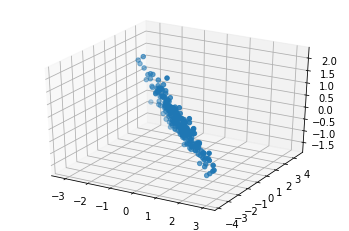

In [148]:
## graph for x ##
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2])
plt.show()

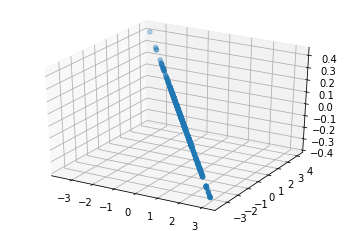

In [150]:
## graph for x_hat_2 ##
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_hat_2[:,0],x_hat_2[:,1],x_hat_2[:,2])
plt.show()